This notebook is made by :
**Vishal Mishra**
Topic : Used Car Price Prediction
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
train_data = pd.read_csv('/content/train-data.csv')
test_data = pd.read_csv('/content/test-data.csv')

In [ ]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
train_data = train_data.iloc[:,1:]
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
train_data.shape

(6019, 13)

In [ ]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
train_data = train_data[train_data['Mileage'].notna()]
train_data = train_data[train_data['Engine'].notna()]
train_data = train_data[train_data['Power'].notna()]
train_data = train_data[train_data['Seats'].notna()]


In [ ]:
train_data = train_data.reset_index(drop=True)

In [ ]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power'] = train_data['Power'][i].split()[0]

In [ ]:
train_data['Mileage'] = train_data['Mileage'].astype(float)
train_data['Engine'] = train_data['Engine'].astype(float)

In [ ]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)

In [ ]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [ ]:
train_data.shape

(5872, 14)

In [ ]:
train_data['Power'] = train_data['Power'].astype(float)

In [ ]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi


In [ ]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [ ]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [ ]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

In [ ]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

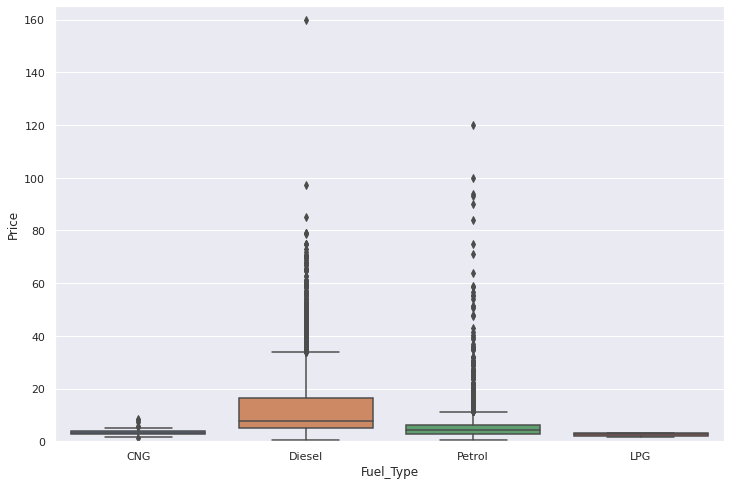

In [ ]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


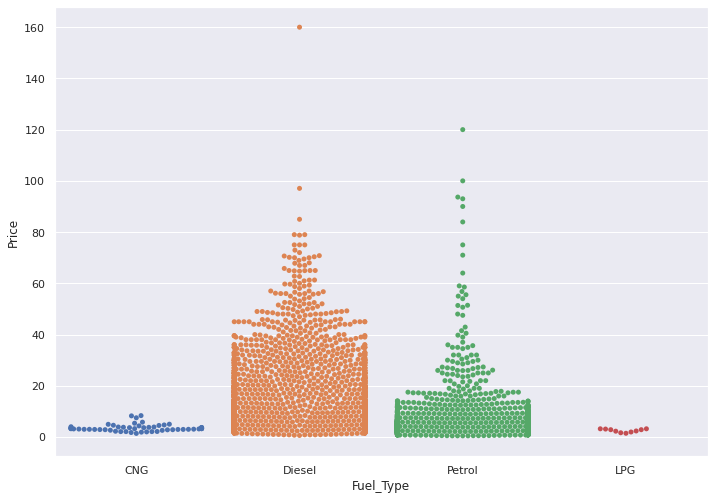

In [ ]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train_data)

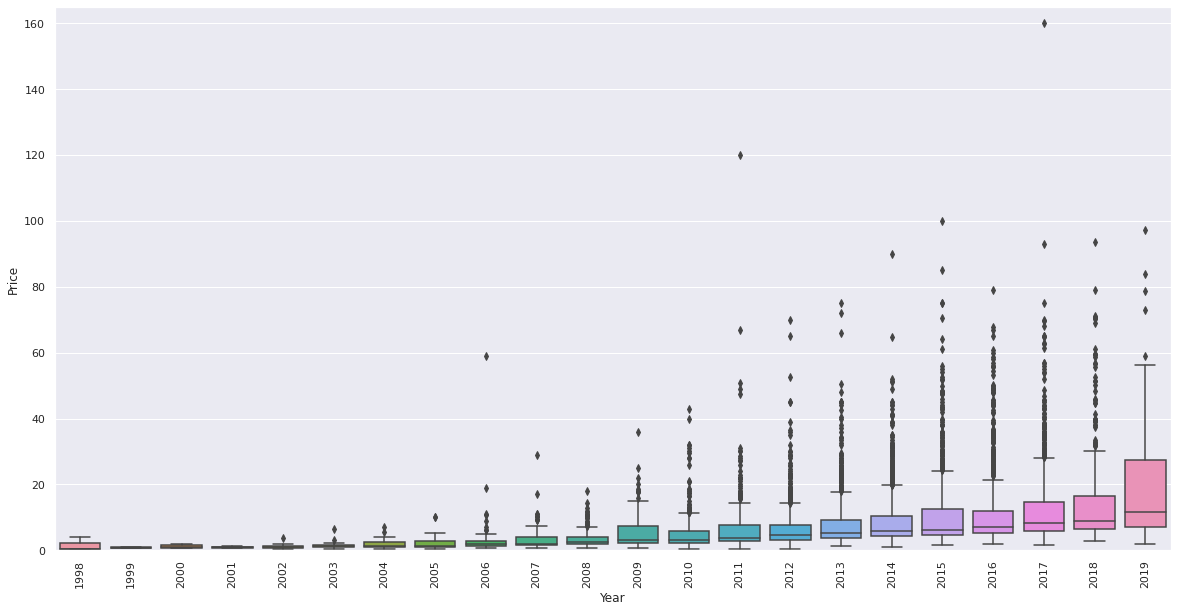

In [ ]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

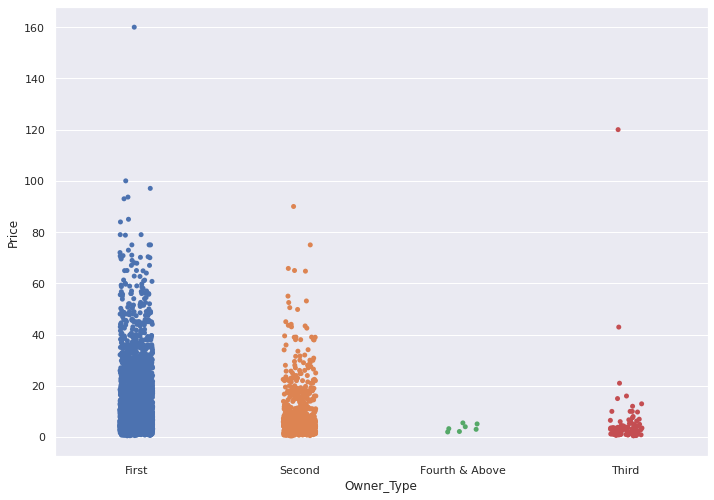

In [ ]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data) 

<Figure size 1440x720 with 0 Axes>

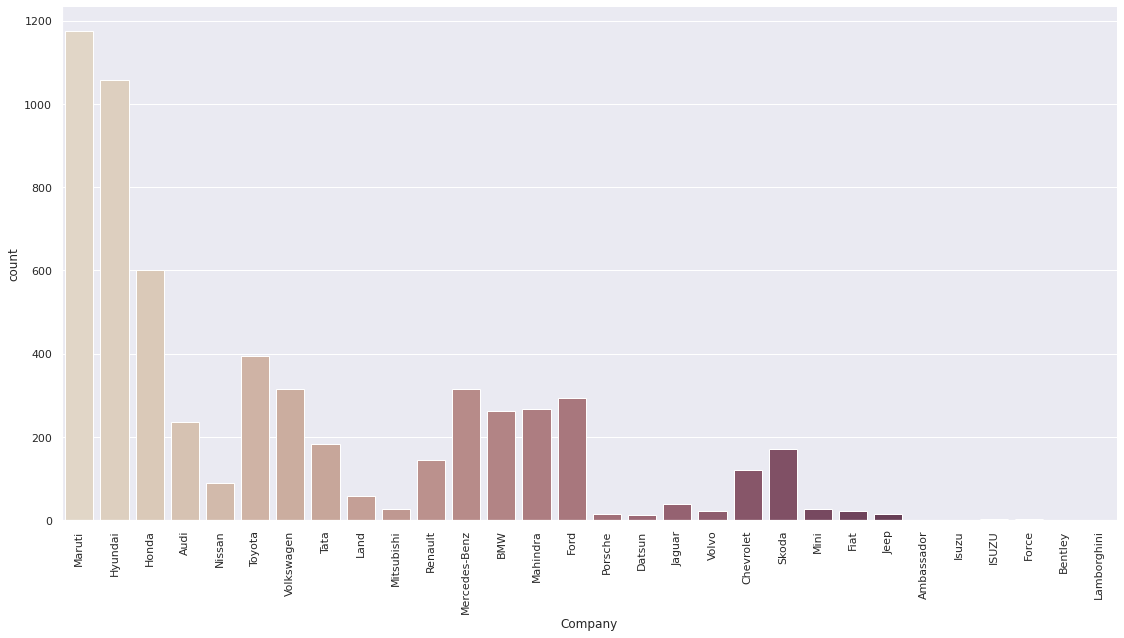

In [ ]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

In [ ]:
var = 'Location'
train_data[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [ ]:
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:
var = 'Fuel_Type'
train_data[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [ ]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [ ]:
var = 'Transmission'
train_data[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

In [ ]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [ ]:
var = 'Owner_Type'
train_data[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [ ]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,NaN


In [ ]:
var = 'Company'
train_data[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

In [ ]:
train_data.drop(["Company"],axis=1,inplace=True)

In [ ]:
final_train= pd.concat([train_data,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,New_car_Price,Location_Bangalore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,NaN,0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,NaN,0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,8.61,0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,NaN,0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,NaN,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
final_train.shape

(5872, 19)

In [ ]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)

test_data = test_data.reset_index(drop=True)

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power'] = test_data['Power'][i].split()[0]

test_data['Mileage'] = test_data['Mileage'].astype(float)
test_data['Engine'] = test_data['Engine'].astype(float)

position = []
for i in range(test_data.shape[0]):
    if test_data['Power'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power'] = test_data['Power'].astype(float)

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)


Shape of test data Before dropping any Row:  (5872, 9)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Final Test Size:  (1201, 18)


In [ ]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [ ]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 18)

In [ ]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


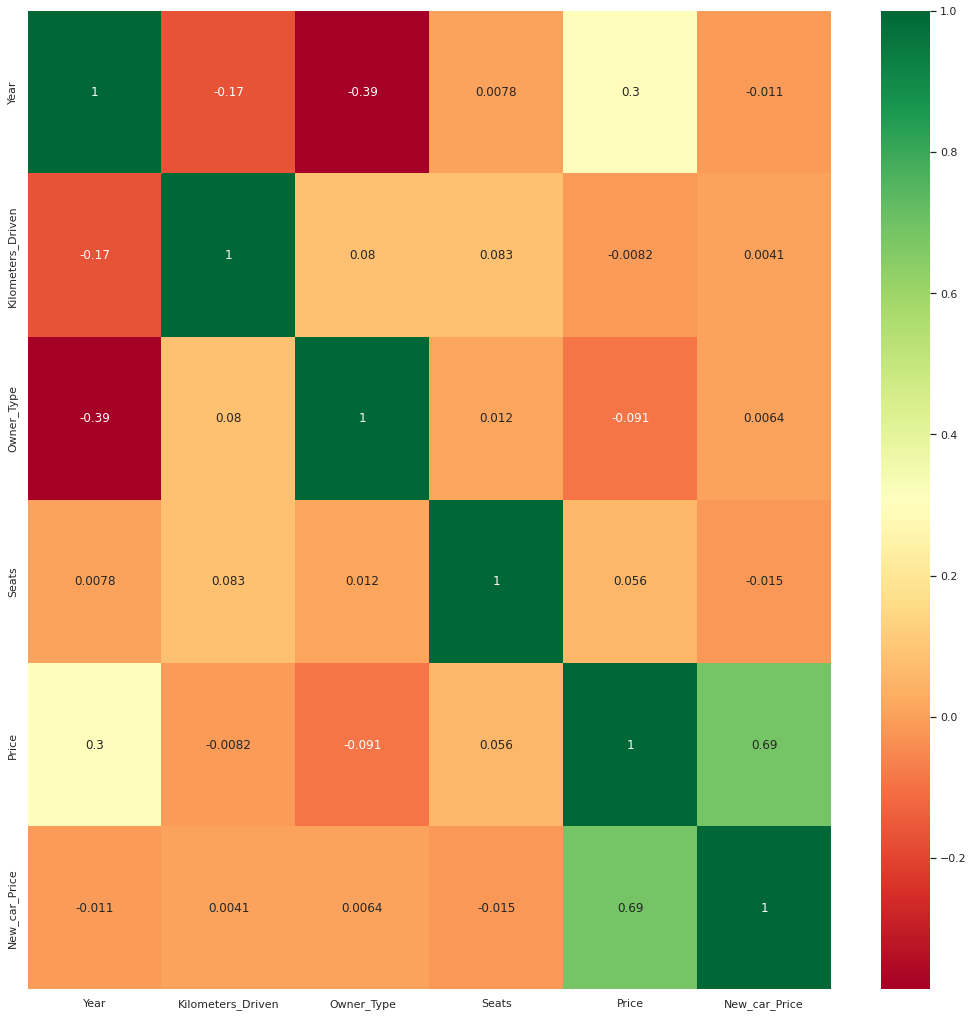

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

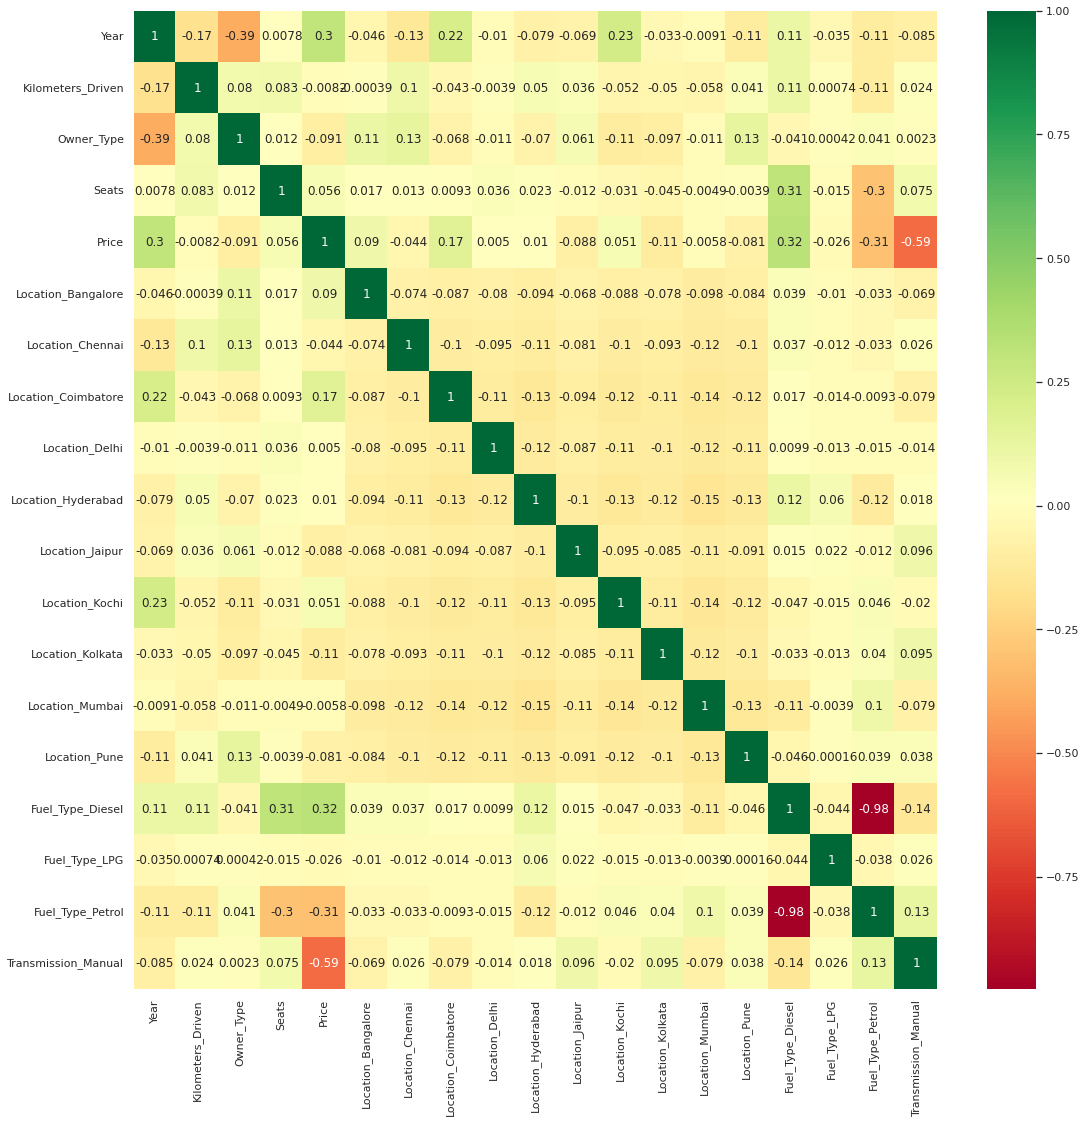

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.4655231146224452
Accuracy on Testing set:  0.46730143223727394


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Training set:  0.9438091597226295
Accuracy on Testing set:  0.5458518007012287


Using **ANN** 

In [ ]:
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
        standard_scaler.fit_transform(X_train),
        columns=X_train.columns
    )
x_test_scaled = pd.DataFrame(
        standard_scaler.transform(X_test),
        columns = X_test.columns
    )

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
59/59 [==============================] - 2s 11ms/step - loss: 0.3270 - mean_squared_logarithmic_error: 0.3267 - val_loss: 0.1854 - val_mean_squared_logarithmic_error: 0.1857
Epoch 2/10
59/59 [==============================] - 0s 7ms/step - loss: 0.1570 - mean_squared_logarithmic_error: 0.1572 - val_loss: 0.1860 - val_mean_squared_logarithmic_error: 0.1861
Epoch 3/10
59/59 [==============================] - 0s 7ms/step - loss: 0.1567 - mean_squared_logarithmic_error: 0.1567 - val_loss: 0.1779 - val_mean_squared_logarithmic_error: 0.1783
Epoch 4/10
59/59 [==============================] - 0s 8ms/step - loss: 0.1626 - mean_squared_logarithmic_error: 0.1626 - val_loss: 0.1951 - val_mean_squared_logarithmic_error: 0.1954
Epoch 5/10
59/59 [==============================] - 0s 8ms/step - loss: 0.1485 - mean_squared_logarithmic_error: 0.1482 - val_loss: 0.1794 - val_mean_squared_logarithmic_error: 0.1796
Epoch 6/10
59/59 [==============================] - 0s 7ms/step - loss: 0.1461 

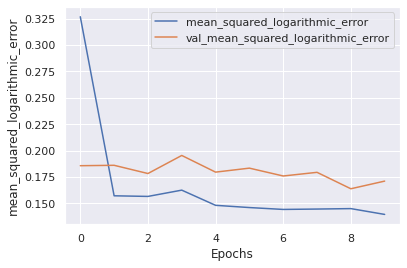

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
X_test['prediction'] = model.predict(x_test_scaled)

In [ ]:
X_test['prediction']

262     11.685645
1886     7.644960
4925     7.143362
5452     1.531452
2189    20.524599
          ...    
633      7.434217
5345    20.688669
1514     6.033781
2193     3.091802
4470     8.564349
Name: prediction, Length: 1175, dtype: float32